In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define dataset paths (update these paths if needed)
dataset_path = r"C:\Users\FAST\Desktop\FYP_work-Dental\FYP_work\DecayDataSrc\Teeth_Dataset\augmented"  
image_dir = os.path.join(dataset_path, "Images1")
mask_dir = os.path.join(dataset_path, "Masks1")

# Define new ROI dataset paths
roi_dataset_path = os.path.join(dataset_path, "ROI_DATA")
roi_image_dir = os.path.join(roi_dataset_path, "Images_ROI")
roi_mask_dir = os.path.join(roi_dataset_path, "Masks_ROI")

# Create directories if they don't exist
os.makedirs(roi_image_dir, exist_ok=True)
os.makedirs(roi_mask_dir, exist_ok=True)

In [3]:
def extract_roi(image, mask, margin=10):
    """ Extract ROI from image and mask based on the mask bounding box. """
    
    # Find contours of the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return image, mask  # Return original if no contour is found

    # Get bounding box coordinates
    x, y, w, h = cv2.boundingRect(np.concatenate(contours))

    # Add margin and clip to valid range
    x = max(x - margin, 0)
    y = max(y - margin, 0)
    w = min(w + 2 * margin, image.shape[1] - x)
    h = min(h + 2 * margin, image.shape[0] - y)

    # Crop image and mask
    cropped_image = image[y:y+h, x:x+w]
    cropped_mask = mask[y:y+h, x:x+w]

    return cropped_image, cropped_mask


In [7]:
from tqdm import tqdm

# Get all image and mask paths
image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.png')])
mask_paths = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith('.png')])

assert len(image_paths) == len(mask_paths), "Mismatch in number of images and masks!"

# Loop through all images
for img_path, mask_path in tqdm(zip(image_paths, mask_paths), total=len(image_paths)):
    # Read images in grayscale
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Extract ROI
    roi_image, roi_mask = extract_roi(image, mask)

    # Save processed images
    cv2.imwrite(os.path.join(roi_image_dir, os.path.basename(img_path)), roi_image)
    cv2.imwrite(os.path.join(roi_mask_dir, os.path.basename(mask_path)), roi_mask)

print("ROI Extraction Completed")


100%|███████████████████████████████████████████████████████████████████████████████| 580/580 [00:04<00:00, 123.35it/s]

ROI Extraction Completed


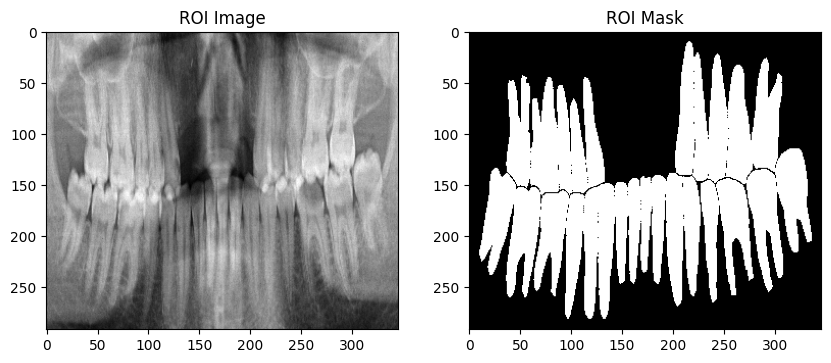

In [8]:
import matplotlib.pyplot as plt

# Load a sample image and mask
sample_img = cv2.imread(os.path.join(roi_image_dir, os.listdir(roi_image_dir)[0]), cv2.IMREAD_GRAYSCALE)
sample_mask = cv2.imread(os.path.join(roi_mask_dir, os.listdir(roi_mask_dir)[0]), cv2.IMREAD_GRAYSCALE)

# Show original and processed ROI
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_img, cmap='gray')
plt.title("ROI Image")

plt.subplot(1, 2, 2)
plt.imshow(sample_mask, cmap='gray')
plt.title("ROI Mask")

plt.show()